<span style="font-size:10pt">AI @ ENSPIMA_2023-2024 / v1.1 september 2023 / Jean-Luc CHARLES (Jean-Luc.charles@mailo.com) / CC BY-SA 4.0 /</span>

# Machine learning with Python tensorflow2/keras modules:

# Train/operate a dense neural network for the recognition of handwritten digits

<br>
<div class="alert alert-block alert-danger">
<span style="color:brown;font-family:arial;font-size:12pt"> 
It is important to use a <span style="font-weight:bold;">Python Virtual Environment</span> (PVE) for your main Python projects: <br>
    a PVE makes it possible to control for each project the versions of the Python interpreter and the "sensitive" modules (like tensorflow).</span></div>

All the notebooks in this directory must be loaded into a `jupyter-notebook` or a `jupyter-lab` launched in the PVE <b><span style="color: rgb(200, 151, 102);" >pyml-pm</span></b> specially created for the session.<br>
They should be worked in this order:
- `ML1_MNIST_en.ipynb`: check that the <b><span style="color: rgb(200, 151, 102);">pyml-pm</span></b> EVP is fuly operationnal, load and use the data from the MNIST database (images and labels).
- `ML2_DNN_part1_en.ipynb`: build a Dense Neural Network (DNN), train it with data from the MNIST and evaluate its performance.
- `ML2_DNN_part2_en.ipynb`: reload a previously trained DNN and evaluate its performance with the MNIST test data.

***Targeted learning objectives:***
- Know how to reload the structure and the weights of a previously trained DNNN.
- Know how to exploit the reloaded trained DNN with the `predict` method.
- Know how to display and use the matrix of confusion.

## 1 - Verify importing Python modules
The **keras** module which allows high-level manipulation of **tensorflow** objects is integrated in the **tensorflow** (tf) module since version 2. <br>
The **tf.keras** module documentation to consult is here: https://www.tensorflow.org/api_docs/python/tf/keras.

Importing the `tensorflow` module in the cell below may generate some warning messages...<br>
if errors appear they must be corrected, possibly by recreating your PVE <b><span style="color: rgb(200, 51, 102);">pyml-pm</span></b>:

In [1]:
import os, sys, cv2

# Delete the (numerous) warning messages from the **tensorflow** module:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(f"Python    : {sys.version.split()[0]}")
print(f"tensorflow: {tf.__version__} incluant keras {keras.__version__}")
print(f"numpy     : {np.__version__}")
print(f"OpenCV    : {cv2.__version__}")

Python    : 3.8.18
tensorflow: 2.9.1 incluant keras 2.9.0
numpy     : 1.22.3
OpenCV    : 4.6.0


Embedding matplotlib plots in the notebook:

In [2]:
%matplotlib inline

# Reminder of the structure of the DNN

In this notebook we use a **Dense Neural Network** , with:
- an **input layer** of 784 values between 0 and 1 (the pixels of the MNIST 28 $\times$ 28 images flattened to a normalized vector of 784 `float` numbers),
- a **hidden layer** of 784 neurons with the `relu` activation function,
- an **output layer** of 10 neurons for the classification of images into 10 classes associated with the digits {0,1,2...9}, using the `softmax` activation function adapted to classification problems.
<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="img/archiNetwork.png" alt="archiNetwork.png" style="width:900px;"><br>
    [image credit: JLC]
</p>

<hr>

## Work to do
### 1 - Load and pre-process the MNIST test data set
### 2 - Reload the trained DNN structure and its weights
### 3 - Exploit the trained DNN with predict method
### 4 - Display the matrix of confusion
<hr>
<br>

## 1 - Load and pre-process MNIST test data set

The work of loading MNIST images has been explained in the *notebook* `ML1_MNIST_en.ipynb`:

In [3]:
# Load the MNIST data set:
(im_train, lab_train), (im_test, lab_test) = tf.keras.datasets.mnist.load_data()

# Define parameters :
nb_im_test  = im_test.shape[0]     # number of test images
nb_pixel    = im_test[0].size      # number of pixels per image
nb_class   = len(set(lab_test))    # number of classes (10 digits from 0 to 9)

print(f"{nb_im_test} test images")
print(f"{nb_pixel} pixels in each image")
print(f"{nb_class} classes (the digits from 0 to 9)")

# Flatten and normalize matrixes:
x_test  = im_test.reshape(nb_im_test, nb_pixel)/im_test.max()

# 'one-hot' encoding of the labels:
from tensorflow.keras.utils import to_categorical
y_test  = to_categorical(lab_test)

10000 test images
784 pixels in each image
10 classes (the digits from 0 to 9)


## 2 - Reload the trained network structure and weights

The `load_model` method of the `tf.keras.models` class reloads **the structure** and **the weights** of a trained network.<br>
So you can build __and__ relod the DNN trained in the previous notebook:

In [4]:
# define the path for the DNN trained in the previous notebook:
key = 'trained-1_model'
model_path = os.path.join('models', key)

# load the DNN structure and weights:
model = tf.keras.models.load_model(model_path)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 C1 (Dense)                  (None, 784)               615440    
                                                                 
 C2 (Dense)                  (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


## 3 - Exploiting the trained network: `predict` method

The `predict` method is used to compute the DNN inferences for one or more inputs (see the `predict` method in the page 
[tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#predict)).

The cell below shows an example:

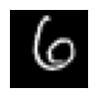

1/1 [==============================] - 0s 82ms/step
DNN inférence for the test image #100 :
[1.4220675e-06 2.9365321e-08 1.3318005e-07 5.9218797e-10 3.7401566e-07
 2.4555077e-06 9.9999535e-01 9.6788042e-08 8.4406345e-08 7.7706352e-10]


In [5]:
i = 100  # number of the test image 

# display the image:
from utils.tools import plot_images
plot_images(im_test,1,1,i) ; plt.show()

# compute the trained DNN inference inférence for tes test image:
rep = model.predict(x_test[i:i+1])      # Warning: x must be an array of matrixes, not a simple matrix
                                        # => x[i] does not work!

print(f"DNN inférence for the test image #{i} :\n{rep[0]}")

To make the output of the network more readable, we can limit the display of the numpy array to 2 decimal places:

In [6]:
with np.printoptions(formatter={'float':'{:.2f}'.format}):    
    print(f"DNN inférence for the test image #{i} rounded to 2 digits: {rep[0]}")

DNN inférence for the test image #100 rounded to 2 digits: [0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00]


The `argmax` method of the *ndarray* class of *numpy* gives the rank of the maximum value in the array:

In [7]:
print(f"Predicted label is rep[0].argmax(): {rep[0].argmax()}")
print(f"Actual label of the test image #{i} : {lab_test[i]}")

Predicted label is rep[0].argmax(): 6
Actual label of the test image #100 : 6


### $\leadsto$ The usefulness of numpy's `argmax` method to decode the array of *one-hot* vectors returned by `predict`

When you compute inferences of the DNN for the images of the `x_test` array for example, you get an array of *one-hot* vectors:

In [8]:
results = model.predict(x_test)
print("shape of the 'results' ndarray:", results.shape)
print("Example of of vectors in the 'result' ndarray:")
with np.printoptions(formatter={'float':'{:.2f}'.format}): 
    print("\tresults[0]  :", results[0])
    print("\tresults[-1] :", results[-1])

313/313 [==============================] - 1s 3ms/step
shape of the 'results' ndarray: (10000, 10)
Example of of vectors in the 'result' ndarray:
	results[0]  : [0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00]
	results[-1] : [0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00]


With the expression `results.argmax(axe=-1)`, you get the array of the `argmax` of each vector $\leadsto$ the array of the classes computed by the network:

In [9]:
inferences = results.argmax(axis=-1)
print(f"inferences.shape: {inferences.shape}, inferences.dtype: {inferences.dtype}")
print(f"Content of 'inferences': {inferences}")

inferences.shape: (10000,), inferences.dtype: int64
Content of 'inferences': [7 2 1 ... 4 5 6]


We can compare `inferences` and `lab_test` with the `==` operator (it makes sense with *ndarray* objects):

In [10]:
inferences == lab_test

array([ True,  True,  True, ...,  True,  True,  True])

by counting the number of `True` we get the number of correct inferences:

In [11]:
inference_ok = (inferences == lab_test)
print(f"number of true inferences: {inference_ok.sum()} over {nb_im_test} test images")

precision = inference_ok.sum()/nb_im_test*100
print(f"precision of the trained DNN: {precision:.1f} %")

number of true inferences: 9835 over 10000 test images
precision of the trained DNN: 98.4 %


## 4 - Show Confusion Matrix

The `ConfusionMatrixDisplay.from_predictions` function from the `sklearn.metrics` module displays the **confusion matrix** to visualize:
- on the diagonal: the correct inferences of the DNN, with the number of correct answers in each box
- off diagonal: the DNN errors, with the number of occurrences in each box.

Read the documentation on this page [scikit-learn.org/stable/modules/.../ConfusionMatrixDisplay.from_predictions](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) and complete the cell below to display the confusion matrix:

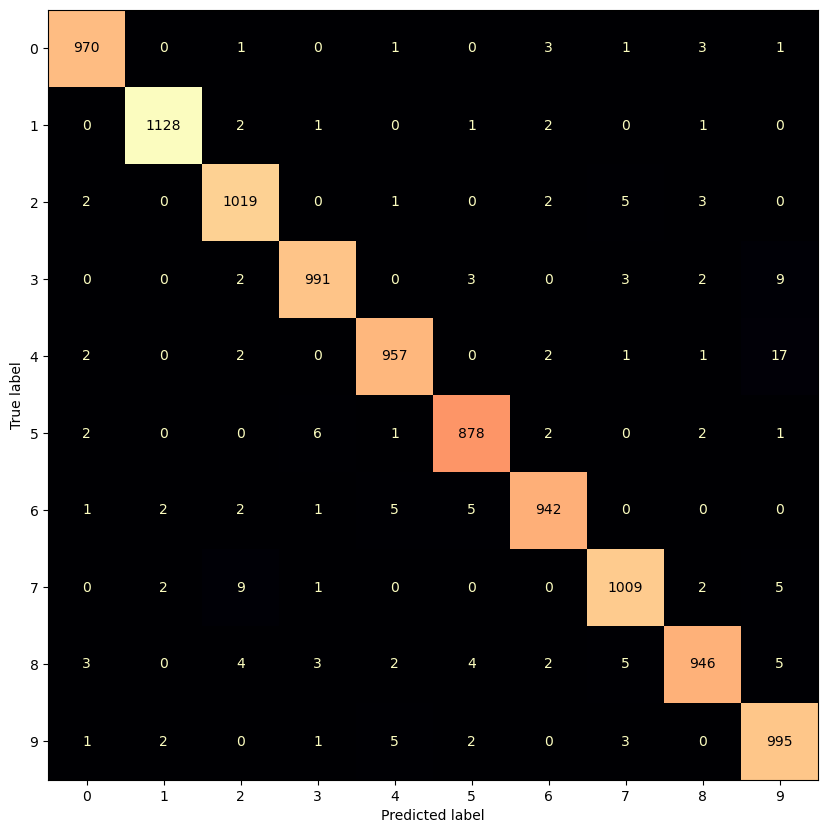

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig = plt.figure(figsize=(10,10))
axis = plt.axes()
ConfusionMatrixDisplay.from_predictions(lab_test, inferences, cmap='magma', ax=axis, colorbar=False)

# Other interesting resources... videos:

In [13]:
%%HTML
<iframe src="https://www.youtube.com/embed/trWrEWfhTVg" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [14]:
%%HTML
<iframe src="https://www.youtube.com/embed/aircAruvnKk" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [15]:
%%HTML
<iframe src="https://www.youtube.com/embed/IHZwWFHWa-w" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [16]:
%%HTML
<iframe src="https://www.youtube.com/embed/Ilg3gGewQ5U" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>